/home/symfac/.local/lib/python3.8/site-packages/mplmagic/__init__.py:40: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = tex_common_preamble


This is how much space the figure will take up on letter paper


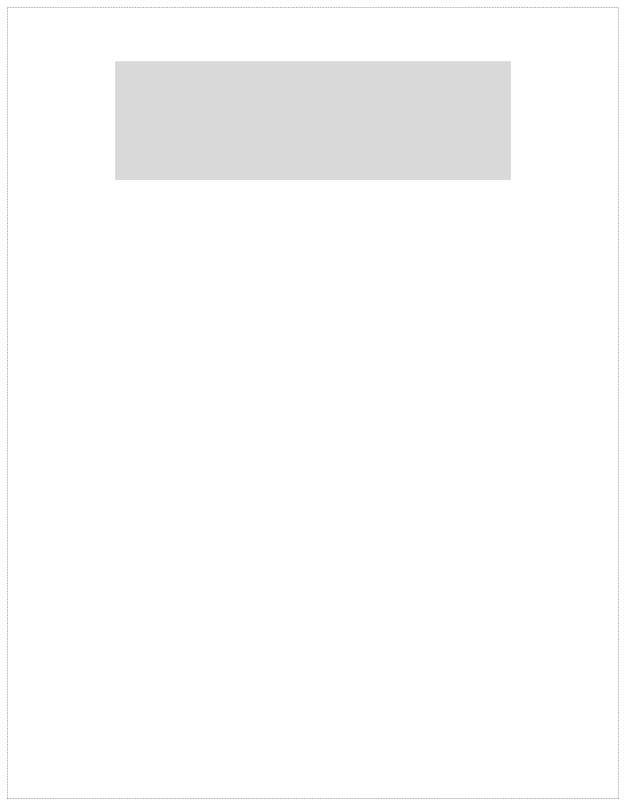

In [1]:
__PRODUCTION__ = 0
__NAME__       = 'learned-comps'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.65

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [2]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import pickle

from symfac.experimental import RBFExpansionV2
from symfac.experimental import RBFExpansionMiniBatch

/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


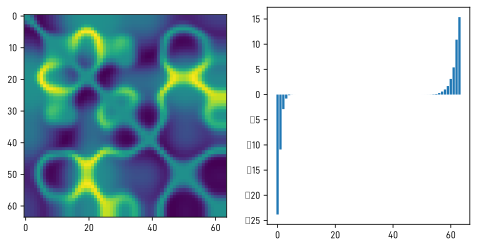

[0.12843, 0.07073, 0.04168, 0.0127, 0.0056, 0.00325, 0.00121, 0.00052, 0.00027]


In [3]:
def rbf(X, Y=None):
    return np.exp(-np.subtract.outer(X, Y if Y is not None else X)**2)

n = 64

np.random.seed(78963)
u = 5 * np.random.randn(n)
v = 4 * np.random.randn(n)
U = gaussian_filter1d(u, 3., order=0)
V = gaussian_filter1d(v, 6., order=0)

K = rbf(U) - rbf(V)
Kt = torch.tensor(K, dtype=torch.float32)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(K)
axs[1].bar(np.arange(n), np.linalg.eigvalsh(K))
plt.show()

U, S, V = np.linalg.svd(K)
svd_K = []
for k in range(1, 10):
    truncation = (U[:, :k] * S[None, :k]) @ V[:k, :]
    svd_K.append(round(float(F.mse_loss(torch.tensor(truncation), torch.tensor(K))), 5))
print(svd_K)

In [56]:
np.min(Kt.numpy())

-0.98680377

In [85]:
k = 2
dim = 64
batch_size = 100
max_steps = 50000

In [86]:
u_start=1/10*torch.randn([batch_size, dim, k], device="cuda") 
a=torch.randn([batch_size, k], device="cuda")
b=torch.randn([batch_size], device="cuda")


In [87]:
u_start

tensor([[[ 0.0688, -0.0155],
         [-0.1393, -0.0087],
         [-0.0454,  0.0421],
         ...,
         [ 0.1260, -0.0589],
         [-0.1872, -0.0527],
         [-0.0339,  0.2133]],

        [[ 0.0011,  0.0368],
         [-0.1722, -0.0079],
         [ 0.0424, -0.0351],
         ...,
         [-0.2478,  0.0198],
         [ 0.0411,  0.0008],
         [-0.0018,  0.1112]],

        [[ 0.0830,  0.1563],
         [ 0.0267, -0.0966],
         [-0.0594,  0.1041],
         ...,
         [-0.1820,  0.0882],
         [ 0.0542, -0.0934],
         [-0.0281, -0.0447]],

        ...,

        [[-0.0670,  0.0647],
         [ 0.0386,  0.0164],
         [ 0.0881, -0.1096],
         ...,
         [-0.0735, -0.0778],
         [-0.0214, -0.0939],
         [ 0.1955, -0.0127]],

        [[ 0.1134, -0.0863],
         [ 0.1056, -0.1250],
         [-0.2043,  0.1763],
         ...,
         [-0.0648,  0.0178],
         [ 0.0385, -0.0662],
         [-0.0710, -0.0818]],

        [[ 0.0386, -0.1132],
       

In [88]:
errors = []

100%|██████████| 1/1 [00:00<00:00, 119.47it/s]

tensor(0.2158)


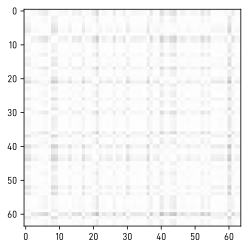

[tensor(0.2158), tensor(0.2158), tensor(0.2158)]


In [104]:
k = 2
u0 = u_start
a0 = a
b0 = b
fac1 = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=1, device="cpu")
fac1.fith(Kt,u0=u0,a0=a0,b0=b0,)
error = fac1.report.loss_best
print(torch.min(error))
errors.append(torch.min(error))
plt.imshow(fac1.optimum(runs=torch.argmin( fac.report.loss_best)), cmap="gray", vmin = -1, vmax = 1)
plt.show()
print(errors)



In [103]:
 fac.report.loss_history

array([[ 4.06842518, 10.47169685,  0.32508719, ...,  3.31894708,
         0.63612521,  0.80037302],
       [ 2.76799703,  8.166049  ,  0.20819582, ...,  2.13506293,
         0.29916823,  0.41945198],
       [ 1.72851014,  6.05965471,  0.23934406, ...,  1.22539341,
         0.23772655,  0.23997927],
       ...,
       [ 0.05715272,  0.08362509,  0.03352291, ...,  0.07275216,
         0.0328958 ,  0.08285626],
       [ 0.05715272,  0.08362511,  0.03352261, ...,  0.07275218,
         0.03287665,  0.08288767],
       [ 0.05715271,  0.08362512,  0.03352246, ...,  0.07275219,
         0.03288747,  0.08286921]])

100%|██████████| 100/100 [00:00<00:00, 205.46it/s]

tensor(0.0108)


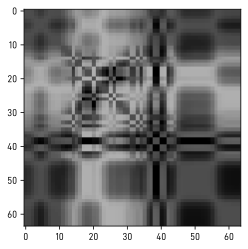

[tensor(0.2158)]


In [96]:
errors2 = []
k = 2
fac2 = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=100, device="cpu")
fac2.fith(Kt,u0=u0,a0=a0,b0=b0,)
error2 = fac2.report.loss_best
print(torch.min(error2))
errors2.append(torch.min(error))
plt.imshow(fac2.optimum(runs=torch.argmin( fac.report.loss_best)), cmap="gray", vmin = -1, vmax = 1)
plt.show()
print(errors2)

In [97]:
u0

tensor([[[ 0.0688, -0.0155],
         [-0.1393, -0.0087],
         [-0.0454,  0.0421],
         ...,
         [ 0.1260, -0.0589],
         [-0.1872, -0.0527],
         [-0.0339,  0.2133]],

        [[ 0.0011,  0.0368],
         [-0.1722, -0.0079],
         [ 0.0424, -0.0351],
         ...,
         [-0.2478,  0.0198],
         [ 0.0411,  0.0008],
         [-0.0018,  0.1112]],

        [[ 0.0830,  0.1563],
         [ 0.0267, -0.0966],
         [-0.0594,  0.1041],
         ...,
         [-0.1820,  0.0882],
         [ 0.0542, -0.0934],
         [-0.0281, -0.0447]],

        ...,

        [[-0.0670,  0.0647],
         [ 0.0386,  0.0164],
         [ 0.0881, -0.1096],
         ...,
         [-0.0735, -0.0778],
         [-0.0214, -0.0939],
         [ 0.1955, -0.0127]],

        [[ 0.1134, -0.0863],
         [ 0.1056, -0.1250],
         [-0.2043,  0.1763],
         ...,
         [-0.0648,  0.0178],
         [ 0.0385, -0.0662],
         [-0.0710, -0.0818]],

        [[ 0.0386, -0.1132],
       

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


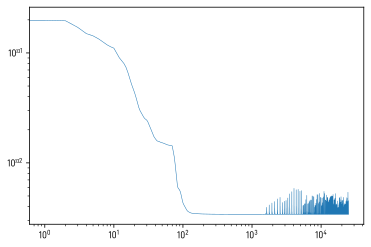

In [41]:
plt.loglog(
        fac.report.loss_history_ticks,
        fac.report.loss_history.min(axis=1)
    )
plt.show()


In [52]:
fac.optimum.a[19,0]

tensor(0.9568)

In [58]:
torch.argmin( fac.report.loss_best)

tensor(19)

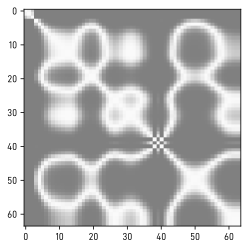

In [65]:
plt.imshow(fac.optimum(runs=19, components=0), cmap="gray", vmin = -1, vmax = 1)

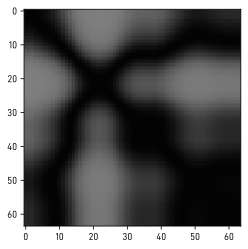

In [64]:
plt.imshow(fac.optimum(runs=19, components=1), cmap="gray", vmin = -1, vmax = 1)

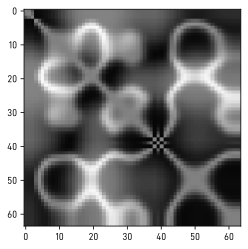

In [66]:
plt.imshow( fac.optimum(runs=torch.argmin( fac.report.loss_best)), cmap="gray", vmin = -1, vmax = 1)

In [4]:
errors.append(torch.min(error))
plt.imshow( fac_mini.optimum(runs=torch.argmin( fac_mini.report.loss_best)))
plt.show()
fac_mini.to_pickle('data/noise_large_{0}.pickle'.format(k))

NameError: name 'error' is not defined

In [101]:
fac.report

report(x_best=[tensor([[[ 4.7032e-01,  3.3253e+00],
         [ 4.4792e-01,  3.4991e+00],
         [ 4.1579e-01,  4.0653e+00],
         ...,
         [ 1.3617e-02,  1.5540e-01],
         [ 1.4214e-02,  1.3228e-01],
         [ 1.2847e-02,  1.3272e-01]],

        [[ 6.0992e-01,  1.3225e+01],
         [ 5.9057e-01,  1.3577e+01],
         [ 5.5746e-01,  1.4132e+01],
         ...,
         [ 5.7886e-01,  3.2286e+00],
         [ 1.9159e-01, -1.1240e+01],
         [ 1.8983e-01, -1.1239e+01]],

        [[ 1.7008e+00, -3.6457e-01],
         [ 1.7262e+00, -3.6548e-01],
         [ 1.7709e+00, -4.0422e-01],
         ...,
         [ 1.0223e+00, -2.3200e-01],
         [ 1.0422e+00, -2.4005e-01],
         [ 1.0423e+00, -2.4137e-01]],

        ...,

        [[-1.6550e+00,  2.6293e-01],
         [-1.9052e+00,  2.5967e-01],
         [-2.4809e+00,  2.6227e-01],
         ...,
         [-8.3903e+00,  1.3752e-01],
         [ 6.9743e+00,  2.7650e-02],
         [ 6.9726e+00,  2.5189e-02]],

        [[ 4.2881e+

In [115]:
s_vals = []
U0, S0, V0 = np.linalg.svd(fac.optimum(runs=best_run, components=0).numpy())
print(U0)

[[-1.10129723e-02 -3.74605879e-02 -1.47171587e-01  2.21665159e-01
  -3.97034407e-01  6.37923300e-01 -5.73981047e-01  1.82974145e-01
  -1.02257030e-02 -7.72655802e-03]
 [-3.16170245e-01 -2.66593188e-01  1.00955563e-02 -2.44627833e-01
   1.42472535e-01 -3.50259393e-02 -3.12326670e-01 -3.15107614e-01
  -4.18187857e-01  6.13002956e-01]
 [-3.40610147e-01  5.70810199e-01 -3.17867994e-01 -7.80783370e-02
   5.33755600e-01  3.96079361e-01  9.54276174e-02  1.19741801e-02
   5.43160771e-04  3.66480759e-04]
 [-3.08209658e-01 -2.72859842e-01 -1.75272245e-02 -2.37037584e-01
   1.78259224e-01 -7.65875131e-02 -3.67485255e-01 -2.75783688e-01
   6.61969066e-01 -2.95149475e-01]
 [-3.62811416e-01 -2.19804853e-01  1.60889298e-01 -2.36510739e-01
  -1.08353451e-01  1.94502950e-01  1.75026387e-01 -6.99013174e-02
  -5.02459168e-01 -6.32987738e-01]
 [-3.84038866e-01 -1.92377239e-01  2.22399577e-01 -2.03989878e-01
  -2.32161731e-01  2.75499105e-01  4.58852321e-01  3.72827142e-01
   3.39736670e-01  3.60092133e-01

In [15]:
print(s_vals[1-1])
print(s_vals[2-1])
print(s_vals[4-1])
print(s_vals[8-1])
print(s_vals[16-1])
print(s_vals[32-1])
print(s_vals[64-1])
print(s_vals[128-1])
print(s_vals[256-1])
print(s_vals[512-1])



0.9957418
0.9919397
0.9844044
0.969684
0.9411498
0.8870293
0.7891392
0.6233142
0.3763922
0.1064658


NameError: name 'errs' is not defined

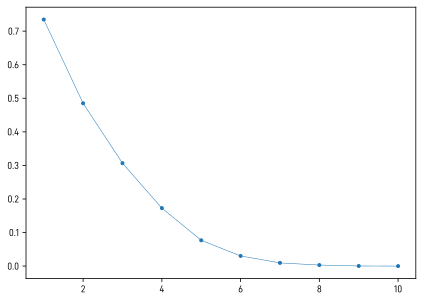

In [13]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(s_vals)+1), s_vals, '.-', label='Gaussian components')
plt.plot(range(1, len(errs)+1), errs, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [14]:
open('gn_losses.pickle', 'wb').write(pickle.dumps([errors, s_vals]))

906

In [15]:
errs, s_vals = pickle.load(open("gn_losses.pickle", "rb"))

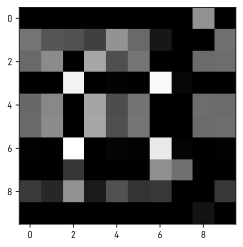

In [46]:
plt.imshow(fac.optimum.a[best_run, 1]*fac.optimum(runs=best_run, components=1), cmap="gray")

In [36]:
best_run = torch.argmin( fac.report.loss_best)

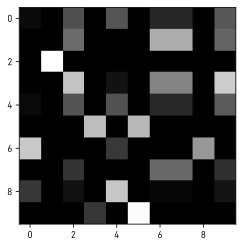

In [45]:
plt.imshow(fac.optimum.a[best_run, 0]*fac.optimum(runs=best_run, components=0), cmap="gray")

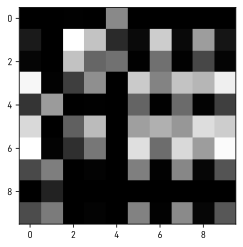

In [44]:
plt.imshow(fac.optimum.a[best_run, 3]*fac.optimum(runs=best_run, components=3), cmap="gray")

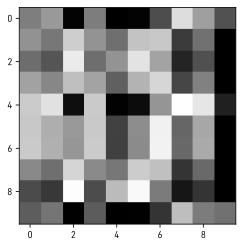

In [47]:
plt.imshow(fac.optimum.a[best_run, 2]*fac.optimum(runs=best_run, components=2), cmap="gray")

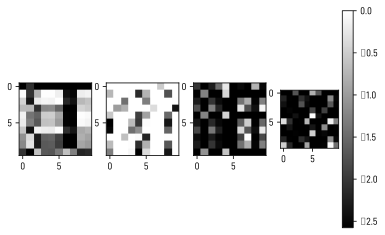

In [94]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
im1 = ax1.imshow(A1, cmap="gray")
im2 = ax2.imshow(A2, cmap="gray")
im3 = ax3.imshow(A3, cmap="gray")
im4 = ax4.imshow(A4, cmap="gray")

fig.colorbar(im2)

In [90]:
fac.optimum.a[best_run, 1]*A2

tensor([[9.8119e-42, 2.3065e-06, 2.9211e-15, -0.0000e+00, 3.9163e-36, 9.7339e-25,
         5.2215e-05, 1.3829e+00, 1.2022e-37, 8.0629e-09],
        [1.9149e+00, 5.7808e-10, 4.0333e-03, 7.0911e-02, 5.6563e+00, 2.0057e+00,
         7.8300e-12, 1.0032e-23, 4.5961e+00, 2.4169e-07],
        [4.9556e-04, 1.9116e-03, 3.8129e+00, 3.6038e-07, 2.0920e-02, 3.4446e+00,
         1.3765e-04, 8.3088e-13, 8.1303e-03, 5.7479e-02],
        [1.3994e-10, 2.6069e+00, 2.0909e+00, 2.3554e-15, 7.5541e-08, 4.4678e-03,
         9.3065e-01, 1.8580e-05, 1.4482e-08, 6.2932e+00],
        [1.5071e+00, 1.5132e-09, 6.9272e-03, 4.5557e-02, 5.1070e+00, 2.4867e+00,
         2.2343e-11, 4.4308e-23, 3.9947e+00, 5.5224e-07],
        [6.7980e+00, 1.7105e-14, 7.2072e-06, 1.8146e+00, 5.2756e+00, 8.5460e-02,
         1.0005e-16, 1.8277e-30, 6.2102e+00, 2.6846e-11],
        [6.5946e+00, 1.6643e-16, 3.5215e-07, 3.8296e+00, 3.0244e+00, 1.4546e-02,
         6.9959e-19, 2.3995e-33, 4.1193e+00, 4.3962e-13],
        [5.4827e-03, 1.474

In [84]:
A1 = fac.optimum(runs=best_run, components=0)
A2 = fac.optimum(runs=best_run, components=1)
A3 = fac.optimum(runs=best_run, components=2)
A4 = fac.optimum(runs=best_run, components=3)

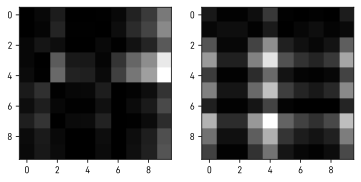

In [123]:
fig, (ax1, ax2) = plt.subplots(1,2)
im1 = ax1.imshow(fac.optimum(runs=best_run, components=0), cmap="gray")
im2 = ax2.imshow(fac.optimum(runs=best_run, components=1), cmap="gray")



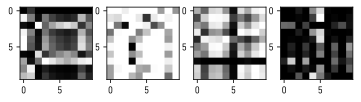

In [108]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
im1 = ax1.imshow(fac.optimum(runs=best_run, components=0), cmap="gray")
im2 = ax2.imshow(fac.optimum(runs=best_run, components=1), cmap="gray")
im3 = ax3.imshow(fac.optimum(runs=best_run, components=2), cmap="gray")
im4 = ax4.imshow(fac.optimum(runs=best_run, components=3), cmap="gray")


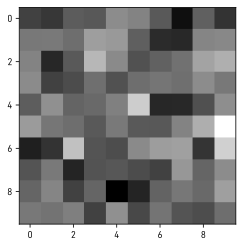

In [110]:
plt.imshow(fac.optimum(runs=best_run, components=0) + fac.optimum(runs=best_run, components=1) + fac.optimum(runs=best_run, components=2) + fac.optimum(runs=best_run, components=3) + fac.optimum.b[best_run], cmap="gray")

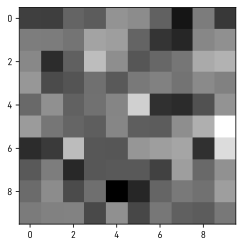

In [88]:
plt.imshow(target, cmap="gray")

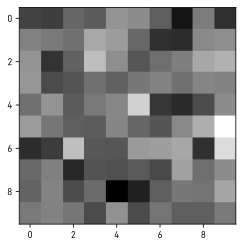

In [71]:
plt.imshow(fac.optimum(runs=best_run, components=0) + fac.optimum(runs=best_run, components=1) + fac.optimum(runs=best_run, components=2) + fac.optimum(runs=best_run, components=3), cmap='gray')

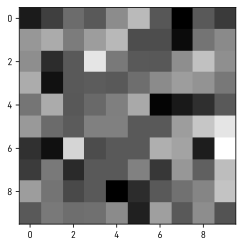

In [99]:
plt.imshow( fac.optimum(runs=torch.argmin( fac.report.loss_best)), cmap="gray")